In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [3]:
df = pd.DataFrame()
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        df = df.append(pd.read_csv(file))
df.to_csv('Airline Satisfaction.csv')

In [4]:
df = pd.read_csv('Airline Satisfaction.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'id'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [9]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [21]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mode()[0], inplace=True)

In [22]:
df.isnull().values.any()

False

In [23]:
df.duplicated().values.any()

False

In [34]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [63]:
cols = df[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']]
len(cols.columns)

19

****************************************************************************************************
Female    65899
Male      63981
Name: Gender, dtype: int64


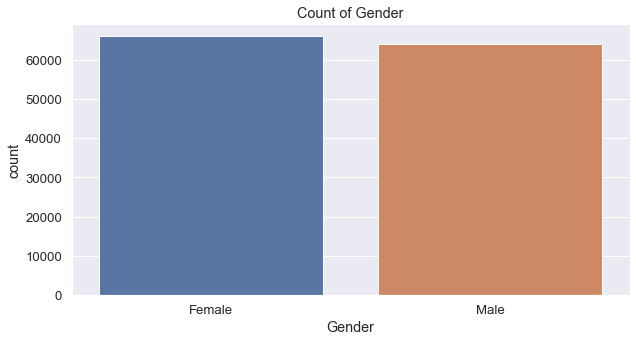

****************************************************************************************************
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64


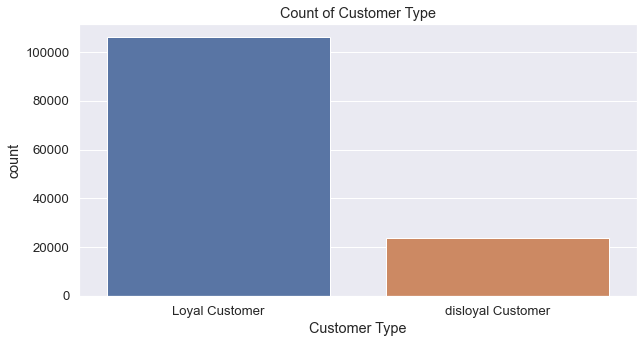

****************************************************************************************************
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64


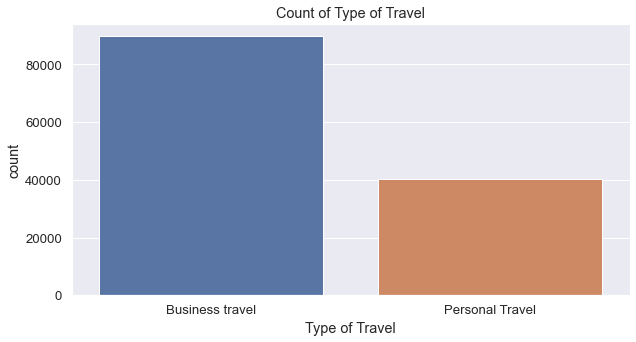

****************************************************************************************************
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


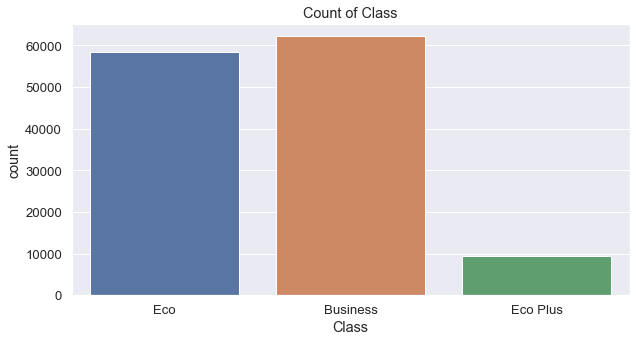

****************************************************************************************************
2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64


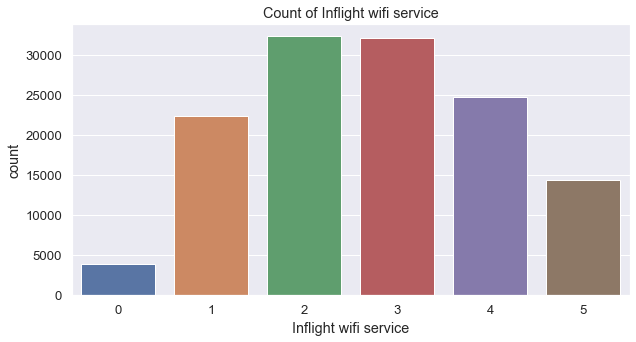

****************************************************************************************************
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64


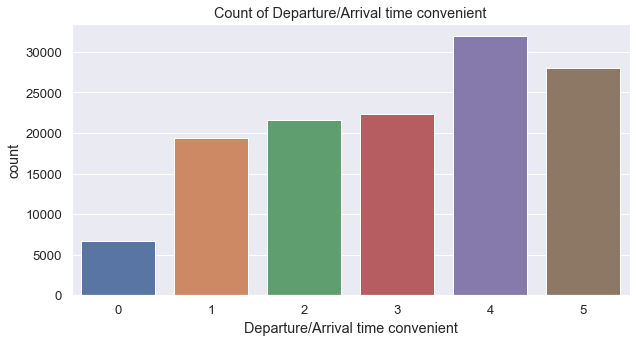

****************************************************************************************************
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64


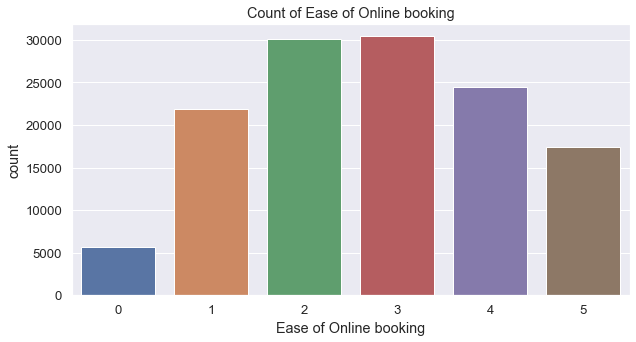

****************************************************************************************************
3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate location, dtype: int64


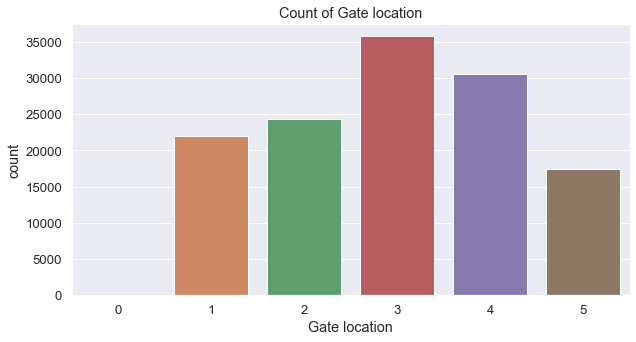

****************************************************************************************************
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and drink, dtype: int64


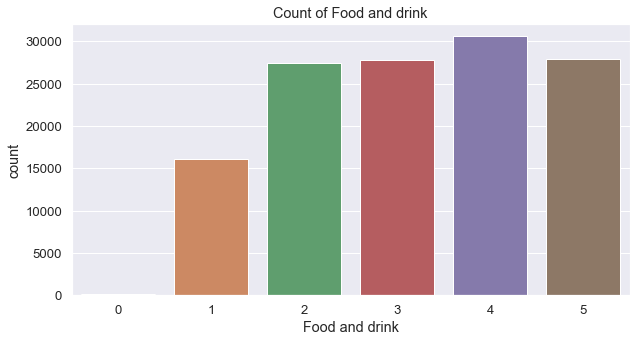

****************************************************************************************************
4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online boarding, dtype: int64


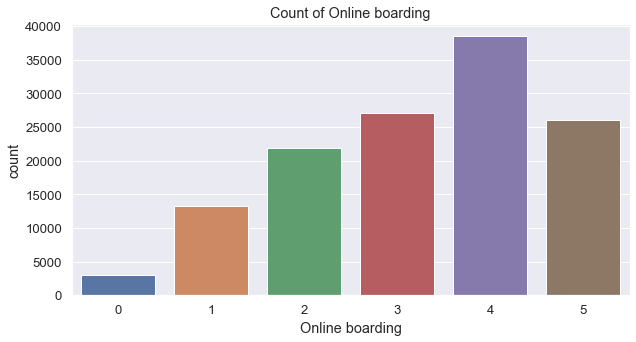

****************************************************************************************************
4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat comfort, dtype: int64


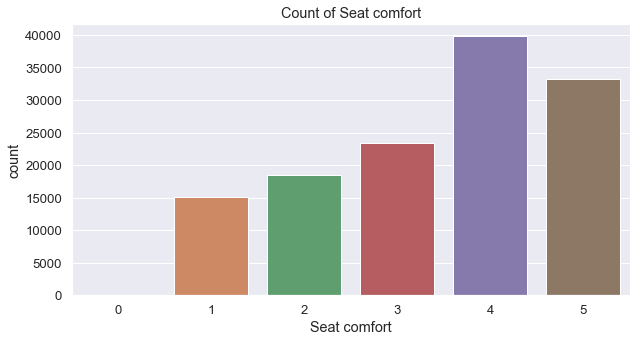

****************************************************************************************************
4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: Inflight entertainment, dtype: int64


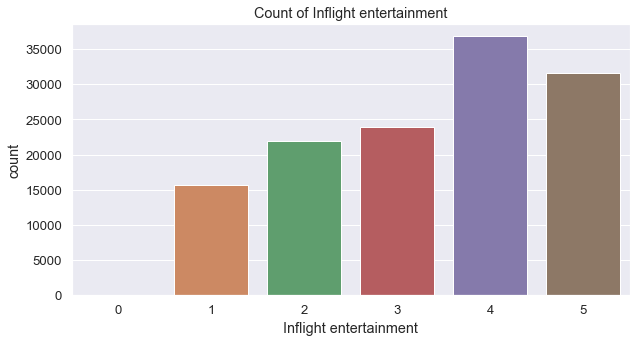

****************************************************************************************************
4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: On-board service, dtype: int64


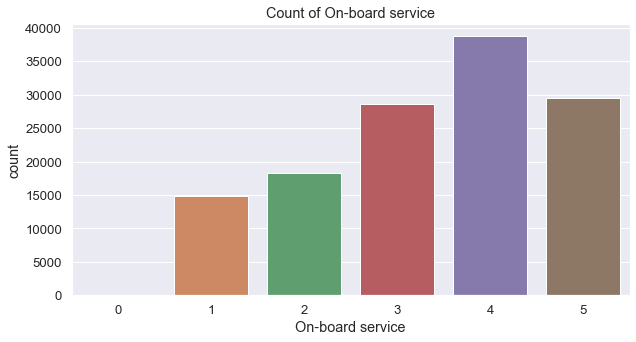

****************************************************************************************************
4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: Leg room service, dtype: int64


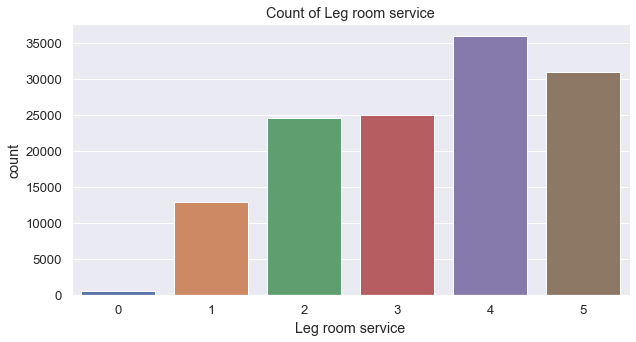

****************************************************************************************************
4    46761
5    33878
3    25851
2    14362
1     9028
Name: Baggage handling, dtype: int64


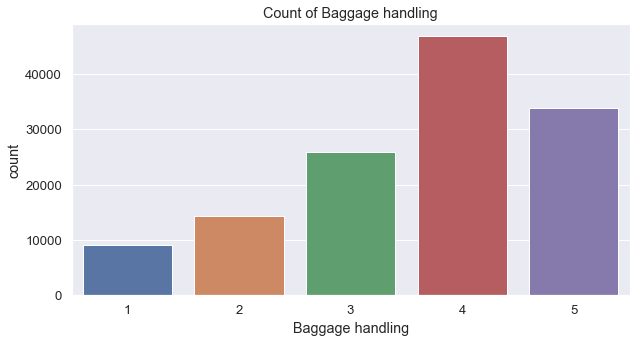

****************************************************************************************************
4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: Checkin service, dtype: int64


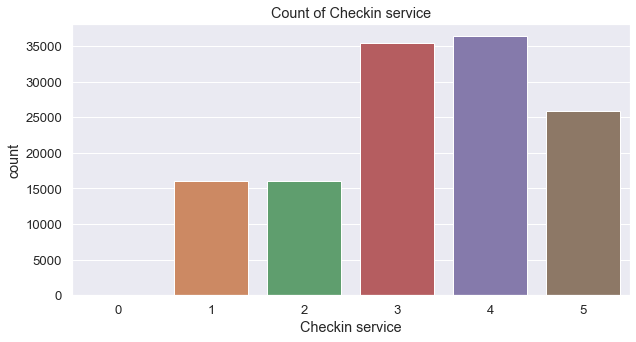

****************************************************************************************************
4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: Inflight service, dtype: int64


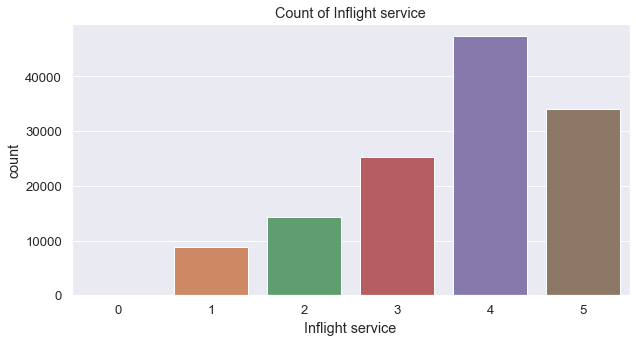

****************************************************************************************************
4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64


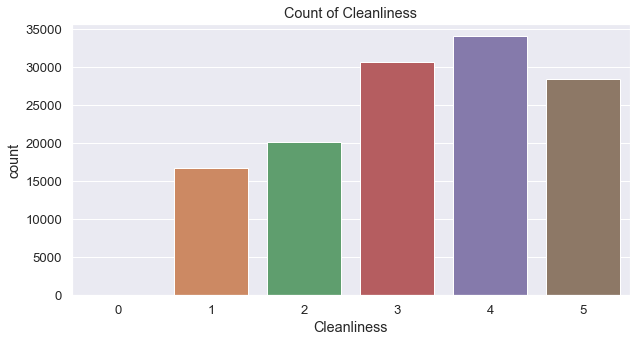

****************************************************************************************************
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


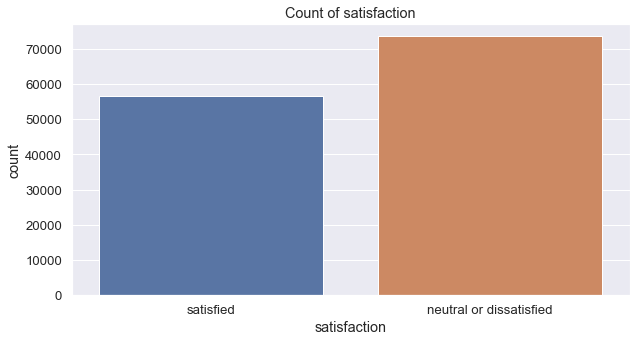

In [36]:
for col in cols:
    print('*'*100)
    print(df[col].value_counts())
    plt.figure(figsize=(10,5))
    sns.countplot(df[col])
    plt.title(f'Count of {col}')
    plt.show()

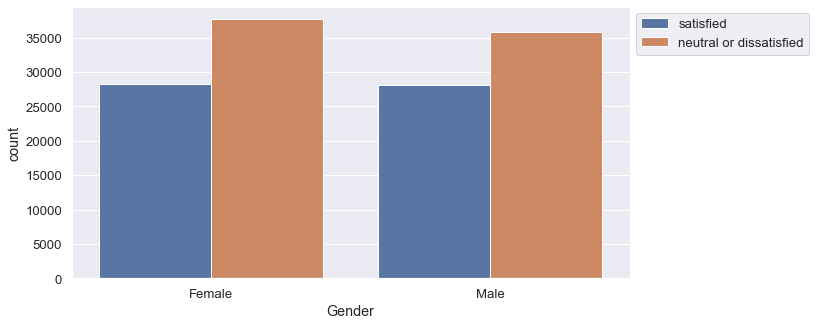

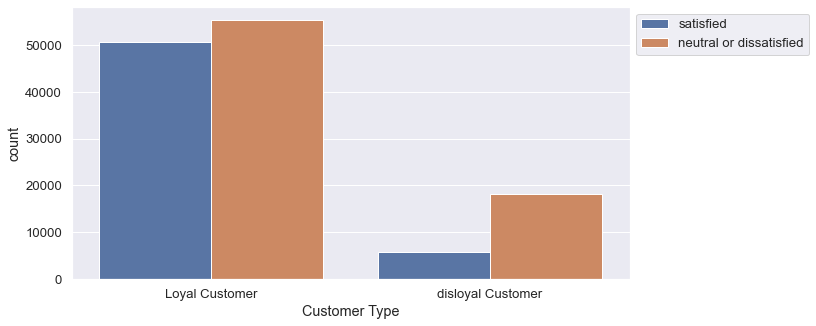

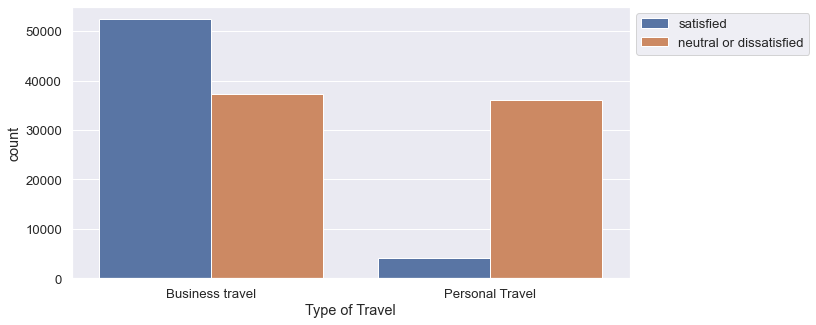

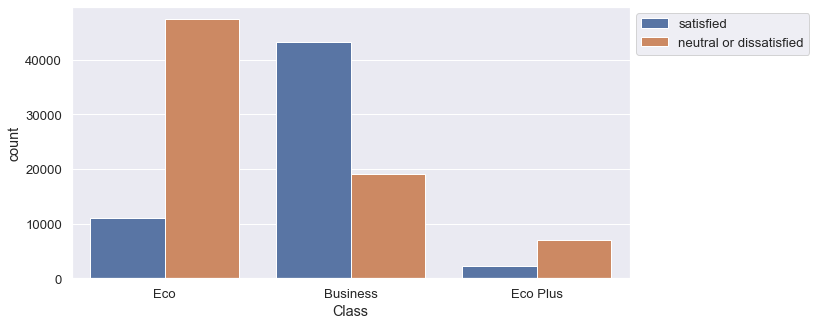

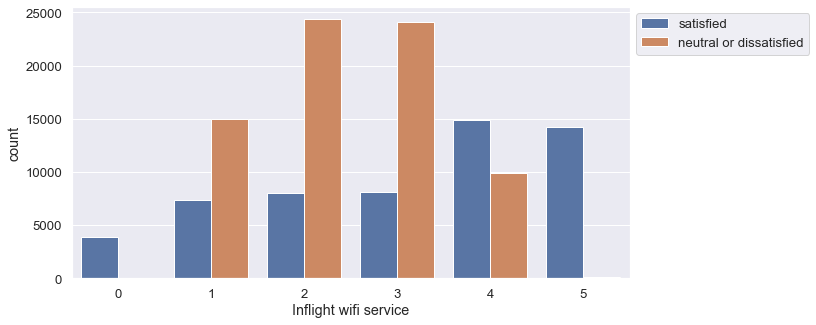

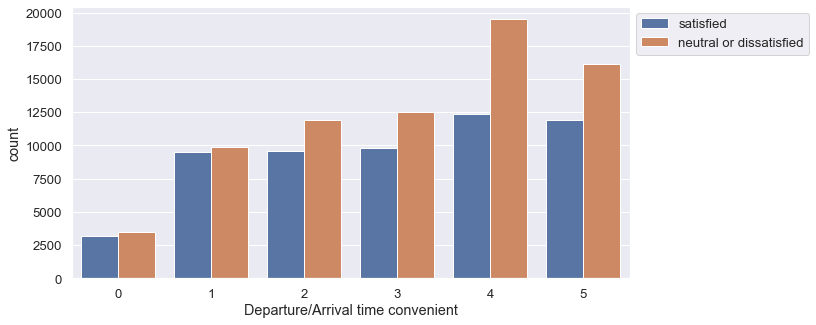

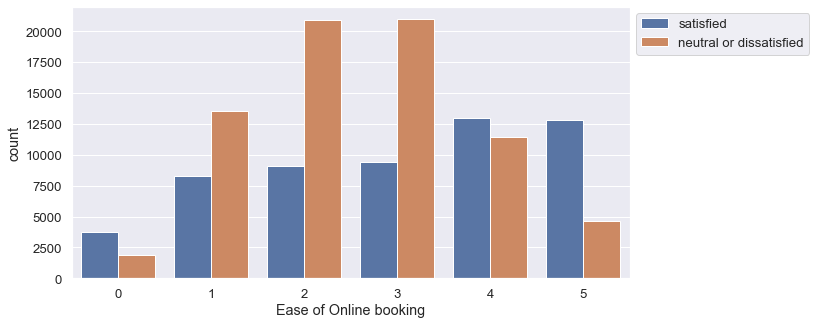

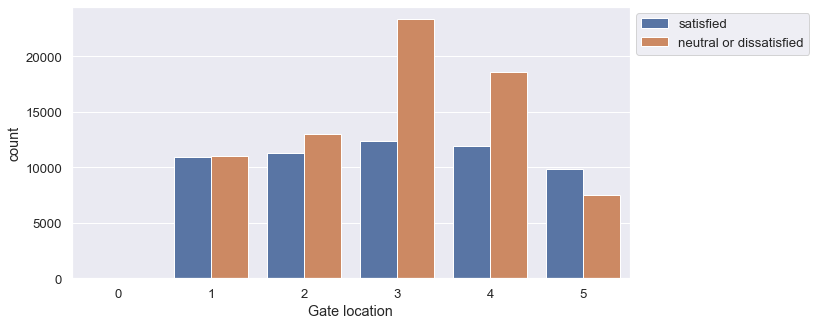

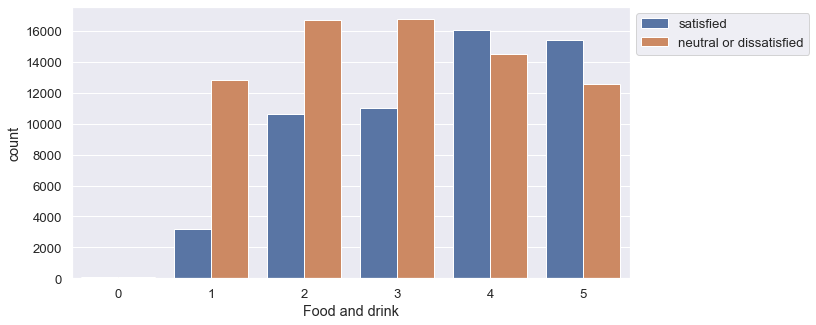

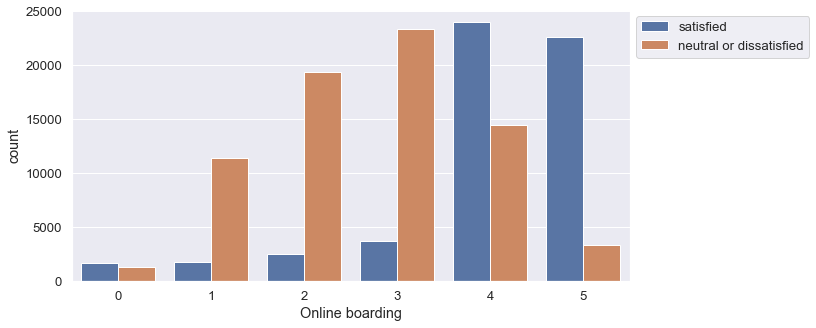

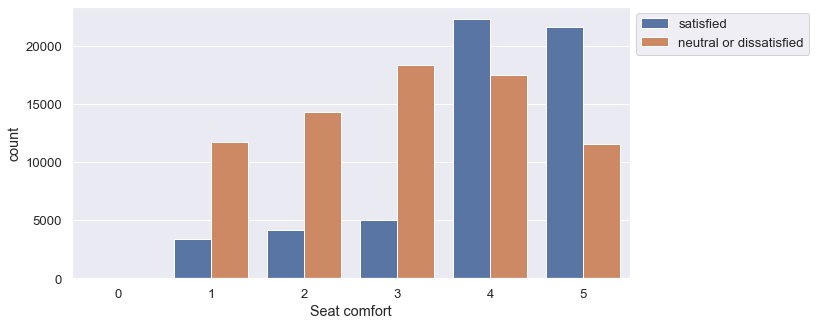

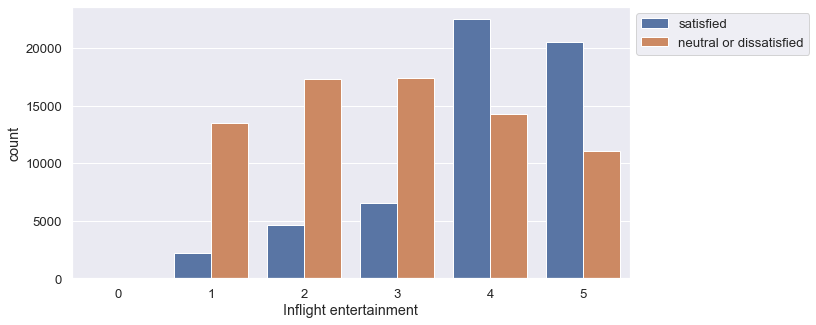

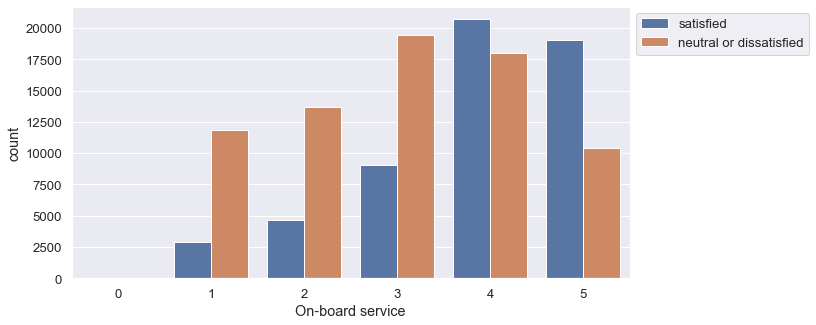

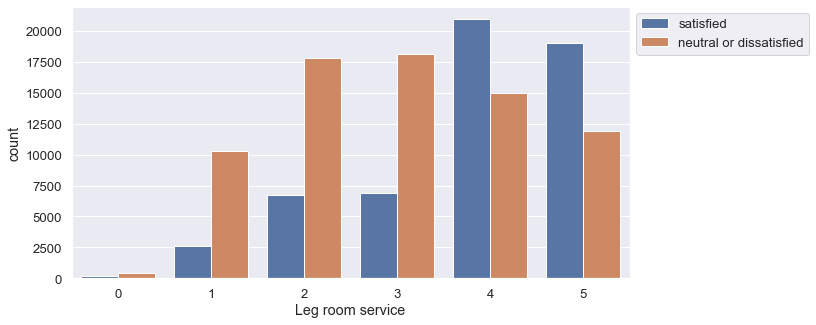

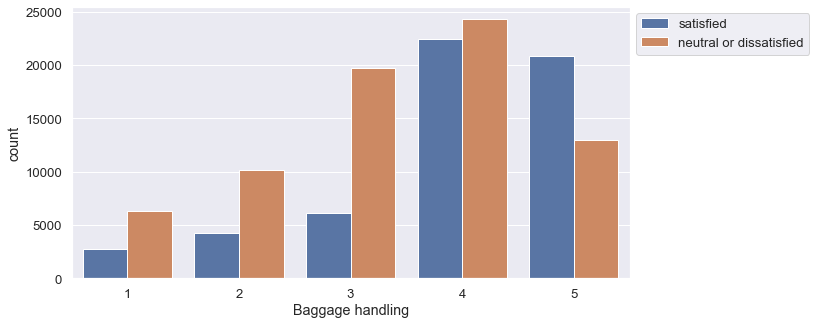

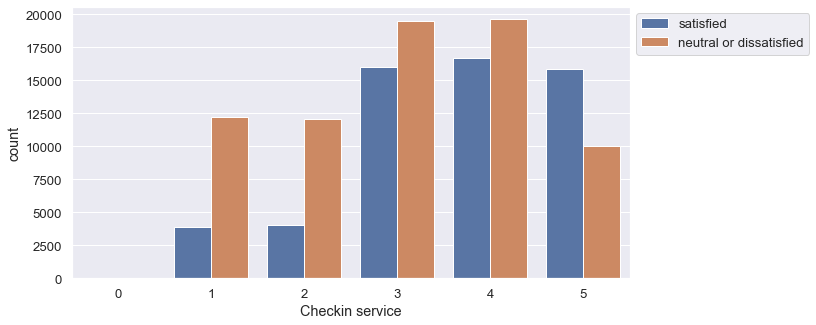

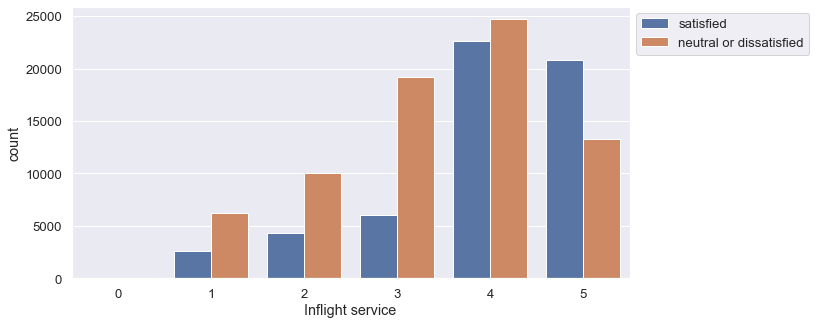

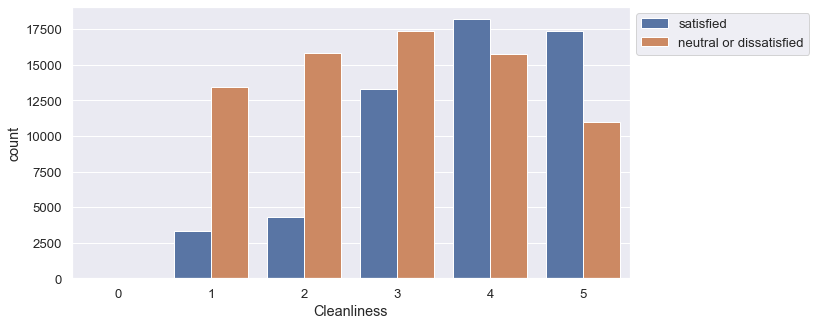

In [68]:
for col in cols[:19]:
    if col != 'satisfaction':
        plt.figure(figsize=(10,5))
        sns.countplot(df[col], hue=df['satisfaction'])
        plt.legend(bbox_to_anchor=(1,1), loc=2)
        plt.show()

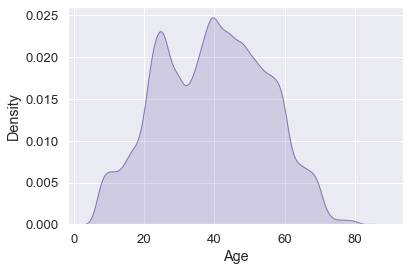

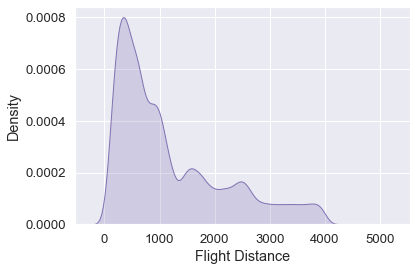

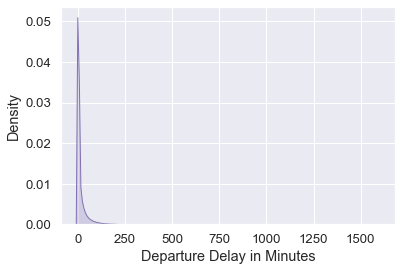

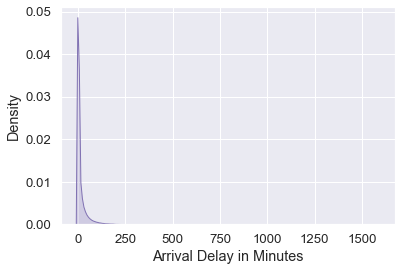

In [56]:
for col in df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]:
    sns.kdeplot(df[col], shade=True, color='m')
    plt.show()

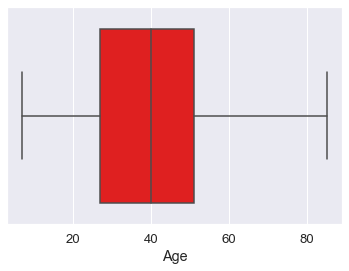

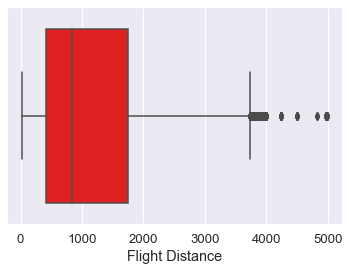

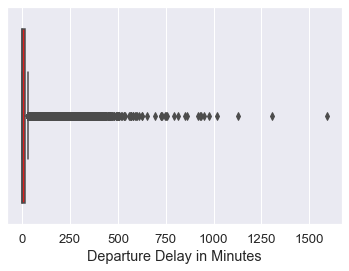

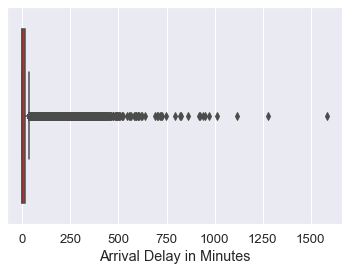

In [59]:
for col in df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]:
    sns.boxplot(df[col], color='red')
    plt.show()

In [69]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [71]:
le = LabelEncoder()
for col in df:
    df[col] = le.fit_transform(df[col])

In [72]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,45,0,1,74,5,4,3,4,...,5,5,5,4,2,5,5,50,44,1
1,0,0,29,0,0,2678,1,1,3,1,...,4,4,4,3,3,4,5,0,0,1
2,1,1,13,0,1,102,2,0,2,4,...,2,4,1,2,2,2,2,0,0,0
3,1,0,37,0,0,3192,0,0,0,2,...,1,1,1,0,3,1,4,0,6,1
4,0,0,42,0,1,1042,2,3,4,3,...,2,2,2,1,4,2,4,0,20,1


In [73]:
df.dtypes

Gender                               int32
Customer Type                        int32
Age                                  int64
Type of Travel                       int32
Class                                int32
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
satisfaction                         int32
dtype: obje

<AxesSubplot:>

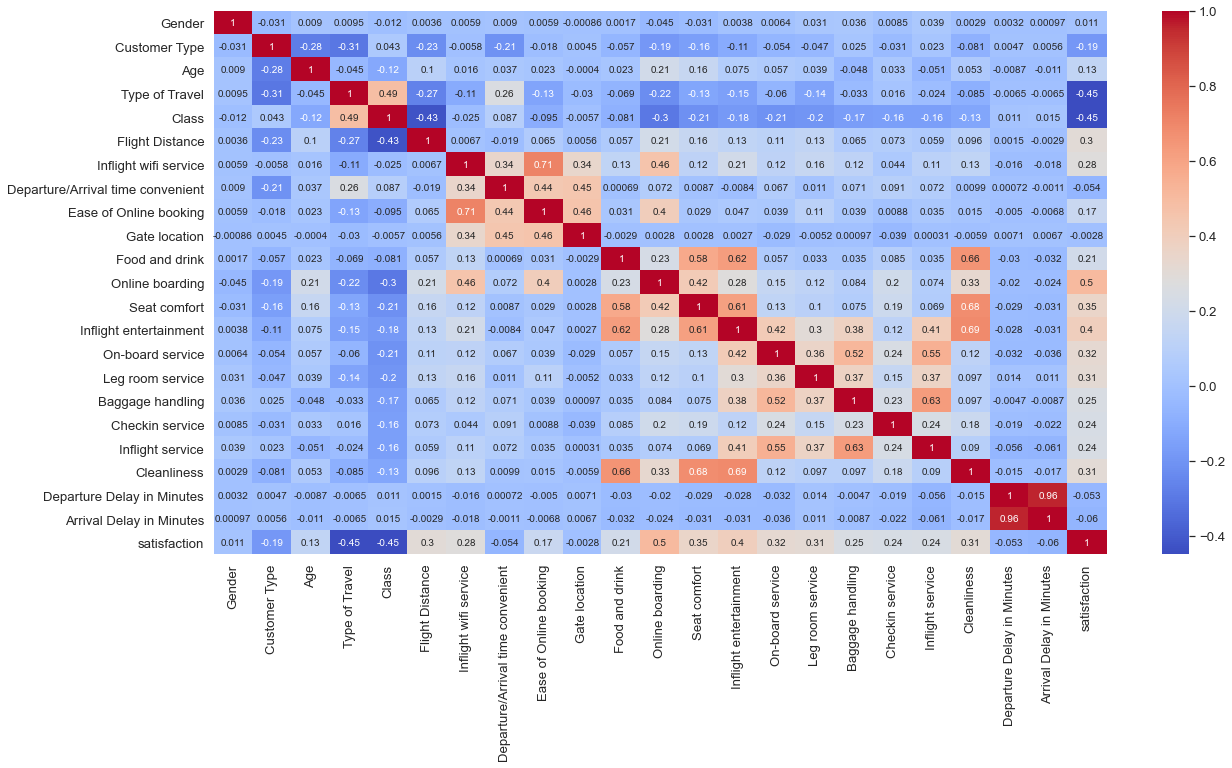

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm' , annot=True)

In [78]:
x = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2 , random_state=42)
print(x_train.shape)
print(x_test.shape)

(103904, 22)
(25976, 22)


In [80]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
models = {
    "LOR": LogisticRegression(),
    "Naive": GaussianNB(),
    "DT" : DecisionTreeClassifier(),
    "RF" : RandomForestClassifier(),
    "XGB": XGBClassifier(),
}

In [94]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Train Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')  
    print(f'F1 Score: {f1_score(y_test, y_pred)}')  

------------------------------
Using model: LOR
Train Score: 0.8743070526639976
Test Score: 0.8756159531875577
F1 Score: 0.8530762584693738
------------------------------
Using model: Naive
Train Score: 0.8637588543270711
Test Score: 0.8640283338466277
F1 Score: 0.8388392042343493
------------------------------
Using model: DT
Train Score: 1.0
Test Score: 0.9479134585771481
F1 Score: 0.9400292540224281
------------------------------
Using model: RF
Train Score: 1.0
Test Score: 0.9634662765629812
F1 Score: 0.9570529936190434
------------------------------
Using model: XGB
Train Score: 0.9743994456421312
Test Score: 0.9642747151216507
F1 Score: 0.9580697632387494
